In [1]:
import re
import sys
import urllib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import quote
from sklearn import preprocessing
from urllib.request import urlopen
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 51)

%matplotlib inline

In [2]:
# params
path = r"/Users/stanislav/Мои документы/ml/1. developer/"

In [3]:
path + "flats_25.10.2018.csv"

'/Users/stanislav/Мои документы/ml/1. developer/flats_25.10.2018.csv'

#### Импорт данных

In [4]:
data = pd.read_csv("flats_25.10.2018.csv", sep=";", low_memory=False, error_bad_lines=False)
data.head()

,Cart_Number,Feature,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,Kindergarten_Count,Products,Products_Distance,Products_Count,Sport,Sport_Distance,Sport_Count
0,100316920,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,13,17,Кирпич,2,"54,1",18,"21,2",2750000,"50831,7929759704",0,1,Самоотделка,9,Совмещенный,8,"55,0725","82,9069",2010,2009-04-21 00:00:00.000,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0
1,100316924,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,10,17,Кирпич,2,"54,5",18,"21,1",2834000,52000,0,1,Требует ремонта,4,Раздельный,9,"55,0725","82,9069",2010,2009-08-17 00:00:00.000,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0
2,10103978,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37,0,0,3250000,"87837,8378378378",0,0,NaN,0,NaN,0,"55,0725","82,9068",2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0
3,10100878,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42,0,0,3790000,"90238,0952380952",0,0,NaN,0,NaN,0,"55,0725","82,9068",2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0
4,10104701,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28,0,0,3100000,"110714,285714286",0,0,Отличное,6,NaN,0,"55,0725","82,9068",2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71862 entries, 0 to 71861
Data columns (total 51 columns):
Cart_Number              71862 non-null int64
Feature                  71862 non-null object
Rooms_Number             71862 non-null int64
Object_Type              71862 non-null object
Object_Type_ID           71862 non-null int64
Settlement               71862 non-null object
Settlement_ID            71862 non-null int64
District                 71859 non-null object
District_Id              71862 non-null int64
Street                   71862 non-null object
Street_Id                71862 non-null int64
House_Number             71702 non-null object
Metro                    69496 non-null object
Metro_ID                 71862 non-null int64
Metro_m                  71862 non-null int64
Flats_Plan               48073 non-null object
Flats_Plan_ID            71862 non-null int64
Stor                     71862 non-null int64
Storeys                  71862 non-null int64
Wall     

In [6]:
print(data.shape)

(71862, 51)


**Временное распределение объявлений**

In [7]:
# Формат времени datetime
data["Date_Create"] = pd.to_datetime(data["Date_Create"])

In [8]:
data["Date_Create_year"] = pd.DatetimeIndex(data["Date_Create"]).year
data["Date_Create_quarter"] = pd.DatetimeIndex(data["Date_Create"]).quarter
data["Date_Create_month"] = pd.DatetimeIndex(data["Date_Create"]).month
data["Date_Create_day"] = pd.DatetimeIndex(data["Date_Create"]).day
data["Date_Create_day_of_the_week"] = pd.DatetimeIndex(data["Date_Create"]).dayofweek

[Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

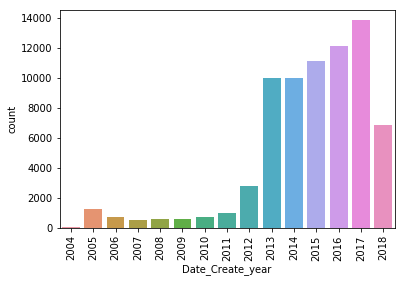

In [9]:
ax = sns.countplot(x="Date_Create_year", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [10]:
data = data[data["Date_Create_year"]>2012]
data.shape

(63813, 56)

In [11]:
data.head()

,Cart_Number,Feature,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,...,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,Kindergarten_Count,Products,Products_Distance,Products_Count,Sport,Sport_Distance,Sport_Count,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week
2,10103978,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37,0,0,3250000,...,0,"55,0725","82,9068",2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0,2016,3,9,27,1
3,10100878,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42,0,0,3790000,...,0,"55,0725","82,9068",2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0,2018,3,7,28,5
4,10104701,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28,0,0,3100000,...,0,"55,0725","82,9068",2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0,2017,2,6,23,4
5,20035060,Продана,2,Улучшенной планировки,3,Новосибирск,1,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59,36,10,4900000,...,9,"55,0725","82,9069",2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0,2015,1,3,10,1
6,10031975,Продана не нами,1,Улучшенной планировки,3,Новосибирск,1,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42,18,12,3750000,...,0,"55,0725","82,9069",2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,0.0,2018,3,8,15,2


#### Меняем формат

In [12]:
# Меняем формат
data["Space_Total"] = data["Space_Total"].str.replace(",",".").astype(float)
data["Space_Living"] = data["Space_Living"].str.replace(",",".").astype(float)
data["Space_Kitchen"] = data["Space_Kitchen"].str.replace(",",".").astype(float)
data["Cost_KV"] = data["Cost_KV"].str.replace(",",".").astype(float)
data["Long"] = data["Long"].str.replace(",",".").astype(float)
data["lat"] = data["lat"].str.replace(",",".").astype(float)            

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63813 entries, 2 to 71861
Data columns (total 56 columns):
Cart_Number                    63813 non-null int64
Feature                        63813 non-null object
Rooms_Number                   63813 non-null int64
Object_Type                    63813 non-null object
Object_Type_ID                 63813 non-null int64
Settlement                     63813 non-null object
Settlement_ID                  63813 non-null int64
District                       63810 non-null object
District_Id                    63813 non-null int64
Street                         63813 non-null object
Street_Id                      63813 non-null int64
House_Number                   63711 non-null object
Metro                          61949 non-null object
Metro_ID                       63813 non-null int64
Metro_m                        63813 non-null int64
Flats_Plan                     42884 non-null object
Flats_Plan_ID                  63813 non-null int64

#### Удаление бесполезных переменных

In [14]:
for col in data.columns:
    print(col, len(data[col].unique()))

Cart_Number 63813
Feature 2
Rooms_Number 4
Object_Type 26
Object_Type_ID 26
Settlement 1
Settlement_ID 1
District 15
District_Id 15
Street 572
Street_Id 631
House_Number 1205
Metro 16
Metro_ID 16
Metro_m 2400
Flats_Plan 22
Flats_Plan_ID 22
Stor 29
Storeys 29
Wall 8
Wall_ID 16
Space_Total 1838
Space_Living 1331
Space_Kitchen 744
Cost 2896
Cost_KV 20085
Balcon_Num 7
Lodgee_Num 11
Sost 8
Sost_ID 8
Clozet 12
Clozet_ID 12
lat 3364
Long 3689
Date_Postr 107
Date_Create 63810
Childrens_leisure 495
Childrens_Distance 610
Childrens_Count 91
Schools 228
Schools_Distance 676
Schools_Count 16
Kindergarten 357
Kindergarten_Distance 590
Kindergarten_Count 28
Products 746
Products_Distance 407
Products_Count 60
Sport 227
Sport_Distance 731
Sport_Count 2
Date_Create_year 6
Date_Create_quarter 4
Date_Create_month 12
Date_Create_day 31
Date_Create_day_of_the_week 7


In [15]:
# Лишь одно уникальное значение для факторов Settlement,Settlement_ID
del_list = ["Settlement","Settlement_ID","Sport_Count"]
data = data.drop(del_list, axis=1)
print(data.shape)

(63813, 53)


#### Описательные статистики выборки

In [16]:
data.describe()

,Cart_Number,Rooms_Number,Object_Type_ID,District_Id,Street_Id,Metro_ID,Metro_m,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost_ID,Clozet_ID,lat,Long,Date_Postr,Childrens_Distance,Childrens_Count,Schools_Distance,Schools_Count,Kindergarten_Distance,Kindergarten_Count,Products_Distance,Products_Count,Sport_Distance,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week
count,6.381300e+04,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,6.381300e+04,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,6.381300e+04,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000,57708.000000,57708.000000,57708.000000,57708.000000,57708.000000,57708.000000,57708.000000,57708.000000,57708.000000,63813.000000,63813.000000,63813.000000,63813.000000,63813.000000
mean,4.223773e+07,1.748296,2.986413,5.491091,1838.740507,279.419977,5.429742e+03,4.487644,5.788194,10.374892,2.634181,46.491415,23.114294,6.684362,2.701760e+06,58389.760439,0.384060,0.439957,3.816464,6.911397,54.954161,82.868300,1969.923558,208.435867,16.827078,270.198014,3.361943,220.894607,7.303719,110.792958,24.320787,281.048624,2015.476047,2.472960,6.375927,15.965305,1.954132
std,5.252923e+07,0.828328,3.696256,2.405860,2301.265376,48.598625,1.147445e+04,7.322074,4.356190,5.400004,9.188415,19.447918,17.026072,4.947257,1.454876e+06,14672.245410,0.543527,0.581280,3.012018,3.302778,1.687092,2.546154,208.860926,165.323518,14.498725,194.446362,2.429897,135.591661,4.682647,93.994056,11.226948,201.285294,1.605680,1.091347,3.325988,8.603408,1.531245
min,1.050930e+05,1.000000,1.000000,0.000000,53.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.100000e+05,3235.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,0.000000
25%,1.007831e+07,1.000000,2.000000,4.000000,645.000000,284.000000,9.200000e+02,0.000000,3.000000,5.000000,1.000000,32.200000,15.200000,4.000000,1.850000e+06,48484.848485,0.000000,0.000000,2.000000,8.000000,54.967700,82.898700,1971.000000,96.000000,6.000000,137.000000,1.000000,126.000000,4.000000,53.000000,17.000000,131.000000,2014.000000,2.000000,4.000000,9.000000,1.000000
50%,2.006709e+07,2.000000,3.000000,6.000000,1096.000000,290.000000,3.970000e+03,3.000000,5.000000,9.000000,2.000000,43.000000,20.000000,6.700000,2.400000e+06,56547.619048,0.000000,0.000000,2.000000,8.000000,55.010400,82.942000,1994.000000,170.000000,13.000000,252.000000,3.000000,196.000000,7.000000,97.000000,24.000000,259.000000,2016.000000,2.000000,6.000000,16.000000,2.000000
75%,3.009190e+07,2.000000,3.000000,7.000000,1593.000000,290.000000,6.890000e+03,3.000000,8.000000,14.000000,2.000000,57.800000,32.000000,9.000000,3.150000e+06,66290.322581,1.000000,1.000000,6.000000,9.000000,55.045900,82.983400,2012.000000,282.000000,24.000000,389.000000,5.000000,295.000000,10.000000,149.000000,32.000000,414.000000,2017.000000,3.000000,9.000000,23.000000,3.000000
max,3.007115e+08,4.000000,44.000000,50.000000,12694.000000,294.000000,2.500000e+06,43.000000,165.000000,28.000000,96.000000,199.020000,1806.000000,101.000000,6.148877e+07,544512.195122,42.000000,13.000000,11.000000,11.000000,55.446900,84.399900,2018.000000,796.000000,92.000000,799.000000,14.000000,794.000000,26.000000,776.000000,59.000000,800.000000,2018.000000,4.000000,12.000000,31.000000,6.000000


In [17]:
data.describe(include=['object'])

,Feature,Object_Type,District,Street,House_Number,Metro,Flats_Plan,Wall,Sost,Clozet,Childrens_leisure,Schools,Kindergarten,Products,Sport
count,63813,63813,63810,63813,63711,61949,42884,60665,52160,52298,54542,49877,56885,57657,51280
unique,2,26,14,572,1204,15,21,7,7,11,494,227,356,745,226
top,Продана не нами,Улучшенной планировки,Октябрьский,Петухова,3,Площадь Маркса,Изолированная,Кирпич,Хорошее,Совмещенный,"Феерия, танцевально-спортивный центр",Новосибирский колледж почтовой связи и сервиса,"Сказка, детский сад №97",Продуктовый магазин,"ЛЕО, центр досуга для детей и взрослых"
freq,35708,35613,11437,1744,1248,18697,26942,27666,22446,29316,3401,1573,1591,5028,1568


### Обработка переменных (выбросы и пропуски)

* **Cart_Number**

In [18]:
#data = data.drop("Cart_Number", axis = 1)
print(data.shape)
data.head()

(63813, 53)


,Cart_Number,Feature,Rooms_Number,Object_Type,Object_Type_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,...,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,Kindergarten_Count,Products,Products_Distance,Products_Count,Sport,Sport_Distance,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week
2,10103978,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,...,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2016,3,9,27,1
3,10100878,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,...,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,7,28,5
4,10104701,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,...,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2017,2,6,23,4
5,20035060,Продана,2,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,...,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2015,1,3,10,1
6,10031975,Продана не нами,1,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,...,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,8,15,2


* **Feature**

In [19]:
print("Количество пропусков ", len(data[data["Feature"].isna()]))

Количество пропусков  0


In [20]:
data["Feature"].value_counts()

Продана не нами    35708
Продана            28105
Name: Feature, dtype: int64

In [21]:
data["we_sale"] = np.where(data["Feature"]=="Продана",1,0)
data["not_we_sale"] = np.where(data["Feature"]=="Продана не нами",1,0)
data.head()

,Cart_Number,Feature,Rooms_Number,Object_Type,Object_Type_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,...,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,Kindergarten_Count,Products,Products_Distance,Products_Count,Sport,Sport_Distance,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week,we_sale,not_we_sale
2,10103978,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,...,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2016,3,9,27,1,0,1
3,10100878,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,...,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,7,28,5,0,1
4,10104701,Продана не нами,1,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,...,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2017,2,6,23,4,0,1
5,20035060,Продана,2,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,...,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2015,1,3,10,1,1,0
6,10031975,Продана не нами,1,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,...,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,8,15,2,0,1


In [22]:
data.drop(["Feature"], axis=1, inplace=True)
data.shape

(63813, 54)

* **Rooms_Number**

In [23]:
print("Количество пропусков ", len(data[data["Rooms_Number"].isna()]))
data["Rooms_Number"].value_counts(dropna=False)

Количество пропусков  0


1    30403
2    20610
3    11259
4     1541
Name: Rooms_Number, dtype: int64

In [24]:
data = pd.get_dummies(data=data,columns=["Rooms_Number"],prefix="room_num")
data.head()

,Cart_Number,Object_Type,Object_Type_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,...,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,Kindergarten_Count,Products,Products_Distance,Products_Count,Sport,Sport_Distance,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week,we_sale,not_we_sale,room_num_1,room_num_2,room_num_3,room_num_4
2,10103978,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,...,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2016,3,9,27,1,0,1,1,0,0,0
3,10100878,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,...,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,7,28,5,0,1,1,0,0,0
4,10104701,Улучшенной планировки,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,...,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2017,2,6,23,4,0,1,1,0,0,0
5,20035060,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,...,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2015,1,3,10,1,1,0,0,1,0,0
6,10031975,Улучшенной планировки,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,...,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,5.0,"У соседа, продовольственный магазин",113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,8,15,2,0,1,1,0,0,0


* **Object_Type**

In [25]:
print("Количество пропусков ", len(data[data["Object_Type"].isna()]))
data["Object_Type"].value_counts()

Количество пропусков  0


Улучшенной планировки        35613
Хрущевка                     11784
Типовая                      11379
Полногабаритная               2231
Малоэтажная                   1031
Малосемейка                    777
Квартиры                       318
Элитная                        257
Общежитие                      199
Индивидуальная планировка       96
Апартаменты                     24
Коридорная система              22
Парковка                        20
Малогабаритная                  13
Пентхаус                        11
Таунхаус                        10
Нежилое помещение                9
Офис                             5
1/2 дома                         5
Прочее                           2
Коттедж                          2
1/4 дома                         1
Гараж                            1
Дом                              1
Овощехранилище                   1
Торговая площадь                 1
Name: Object_Type, dtype: int64

In [26]:
res = data[["Object_Type", "Cost", "Cost_KV"]].groupby(["Object_Type"]).agg({"Cost_KV":"mean", "Cost" : "count" }).reset_index()
res.columns = ["Object_Type", "mean_Cost_KV","count"]
res.sort_values(["count"])

,Object_Type,mean_Cost_KV,count
1,1/4 дома,86129.032258,1
22,Торговая площадь,53097.345133,1
3,Гараж,84761.904762,1
4,Дом,78877.005348,1
14,Овощехранилище,16949.152542,1
19,Прочее,62222.222222,2
8,Коттедж,53441.722973,2
0,1/2 дома,42033.750478,5
15,Офис,80623.436756,5
12,Нежилое помещение,58323.455045,9


In [27]:
# Укрупняем категории
data = data[data["Object_Type"] != 'Овощехранилище']
data["Object_Type"] = np.where(data["Object_Type"].isin(["Пентхаус","Таунхаус","Апартаменты","Коридорная система","Общежития","Офис","Нежилое помещение","Гараж","Торговая площадь","Коттедж","Дом","1/2 дома","1/4 дома","Парковка"]),"Прочее",data["Object_Type"])
data["Object_Type"] = np.where(data["Object_Type"].isin(["Малогабаритная"]),"Малосемейка",data["Object_Type"])
data["Object_Type"] = np.where(data["Object_Type"].isin(["Квартиры","Типовая"]),"Типовые",data["Object_Type"])                             

In [28]:
data["Object_Type"].value_counts()

Улучшенной планировки        35613
Хрущевка                     11784
Типовые                      11697
Полногабаритная               2231
Малоэтажная                   1031
Малосемейка                    790
Элитная                        257
Общежитие                      199
Прочее                         114
Индивидуальная планировка       96
Name: Object_Type, dtype: int64

In [29]:
data = pd.get_dummies(data=data,columns=["Object_Type"],prefix="obj")
data.head()

,Cart_Number,Object_Type_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,...,Products_Distance,Products_Count,Sport,Sport_Distance,Date_Create_year,Date_Create_quarter,Date_Create_month,Date_Create_day,Date_Create_day_of_the_week,we_sale,not_we_sale,room_num_1,room_num_2,room_num_3,room_num_4,obj_Индивидуальная планировка,obj_Малосемейка,obj_Малоэтажная,obj_Общежитие,obj_Полногабаритная,obj_Прочее,obj_Типовые,obj_Улучшенной планировки,obj_Хрущевка,obj_Элитная
2,10103978,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,...,113.0,17.0,"Солнечный, детский бассейн",364.0,2016,3,9,27,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10100878,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,...,113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,7,28,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,10104701,3,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,...,113.0,17.0,"Солнечный, детский бассейн",364.0,2017,2,6,23,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,20035060,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,...,113.0,17.0,"Солнечный, детский бассейн",364.0,2015,1,3,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,10031975,3,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,...,113.0,17.0,"Солнечный, детский бассейн",364.0,2018,3,8,15,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
data.drop("Object_Type_ID",axis=1, inplace=True)

* **District**

In [31]:
print("Количество пропусков ", len(data[data["District"].isna()]))
data["District"].value_counts()

Количество пропусков  3


Октябрьский        11437
Ленинский          11072
Кировский           9622
Калининский         6769
Заельцовский        5770
Дзержинский         5488
Первомайский        5131
Советский           3151
Центральный         3146
Железнодорожный     2200
Новосибирский         13
Бердск                 7
Мошковский             2
Искитимский            1
Name: District, dtype: int64

In [32]:
data["District"]=np.where(data["District"].isin(["Новосибирский","Бердск" ,"Мошковский", "Искитимский"]),"Октябрьский",data["District"])
data["District"].value_counts()

Октябрьский        11460
Ленинский          11072
Кировский           9622
Калининский         6769
Заельцовский        5770
Дзержинский         5488
Первомайский        5131
Советский           3151
Центральный         3146
Железнодорожный     2200
Name: District, dtype: int64

In [33]:
# На карте видно по косвенным призанкам, что пропущен один и тот же район
data[data["District"].isna()]
data.loc[data["District"].isna(),["District"]] = "Калининский"
data.loc[data["District"].isna(),["District_Id"]] = 4
data.loc[data["District"].isna(),["Metro"]] = "Заельцовская"
data.loc[data["District"].isna(),["Metro_ID"]] = 283

In [34]:
print("Количество пропусков ", len(data[data["District"].isna()]))

Количество пропусков  0


In [35]:
data["District1"] = data["District"]
data = pd.get_dummies(data=data,columns=["District1"],prefix="distr")
data.head()

,Cart_Number,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,...,not_we_sale,room_num_1,room_num_2,room_num_3,room_num_4,obj_Индивидуальная планировка,obj_Малосемейка,obj_Малоэтажная,obj_Общежитие,obj_Полногабаритная,obj_Прочее,obj_Типовые,obj_Улучшенной планировки,obj_Хрущевка,obj_Элитная,distr_Дзержинский,distr_Железнодорожный,distr_Заельцовский,distr_Калининский,distr_Кировский,distr_Ленинский,distr_Октябрьский,distr_Первомайский,distr_Советский,distr_Центральный
2,10103978,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,10100878,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,10104701,Центральный,10,Красный проспект,900,181,Заельцовская,283,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,20035060,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
6,10031975,Заельцовский,3,Красный проспект,901,181,Заельцовская,283,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
data.drop("District_Id",axis=1, inplace=True)

* **Street**

In [37]:
print("Количество пропусков ", len(data[data["Street"].isna()]))
data.drop("Street_Id",axis=1,inplace=True)

Количество пропусков  0


Улицу используем для восстановления / обогащения 

* **House_Number**

In [38]:
print("Количество пропусков ", len(data[data["House_Number"].isna()]))

Количество пропусков  102


In [39]:
#Удаляем пробелы
data["House_Number"]=data["House_Number"].str.replace(" ","").str.lower()

Номер дома используем для восстановления / обогащения 

* **Metro**

In [40]:
print("Количество пропусков ", len(data[data["Metro"].isna()]))
data.drop(["Metro_ID"],axis=1, inplace=True)

Количество пропусков  1864


In [41]:
from math import sin, cos, sqrt, atan2, radians

def cov_distance(lat1, long1, lat2, long2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(long1)
    lat2 = radians(lat2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [42]:
metro_geo = {"Заельцовская" : ["55.059410", "82.912488", "0"],
"Гагаринская" : ["55.051071", "82.914770", "0"],
"Красный проспект" : ["55.041168", "82.917429", "0"],
"Площадь Ленина" : ["55.030003", "82.920492", "0"],
"Октябрьская" : ["55.019134", "82.939303", "0"],
"Речной вокзал" : ["55.008573", "82.937821", "0"],
"Студенческая" : ["54.989140", "82.906649", "0"],
"Площадь Маркса" : ["54.983050", "82.893013", "0"],
"Площадь Гарина-Михайловского" : ["55.035385", "82.898780", "0"],
"Сибирская" : ["55.042323", "82.919298", "0"],
"Маршала Покрышкина" : ["55.043768", "82.935539", "0"],
"Берёзовая роща" : ["55.043355", "82.953056", "0"],
"Золотая Нива" : ["55.037969", "82.976215", "0"]}
metro_geo = pd.DataFrame(metro_geo)
metro_geo= metro_geo.astype(float)
metro_geo.head()

,Заельцовская,Гагаринская,Красный проспект,Площадь Ленина,Октябрьская,Речной вокзал,Студенческая,Площадь Маркса,Площадь Гарина-Михайловского,Сибирская,Маршала Покрышкина,Берёзовая роща,Золотая Нива
0,55.059410,55.051071,55.041168,55.030003,55.019134,55.008573,54.989140,54.983050,55.035385,55.042323,55.043768,55.043355,55.037969
1,82.912488,82.914770,82.917429,82.920492,82.939303,82.937821,82.906649,82.893013,82.898780,82.919298,82.935539,82.953056,82.976215
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
def near_metro(x, metro_geo):
    lat1 = x["lat"]
    long1 = x["Long"]
    for col in metro_geo.columns:
        metro_geo[col][2] = cov_distance(lat1, long1, metro_geo[col][0] , metro_geo[col][1])
    return metro_geo.iloc[2].idxmin(axis=1)

In [44]:
data["new_metro"] = data.apply(lambda x:near_metro(x,metro_geo), axis=1)

In [45]:
data["new_metro"].value_counts()

Площадь Маркса                  17716
Золотая Нива                    10825
Заельцовская                     9661
Речной вокзал                    7040
Студенческая                     5594
Берёзовая роща                   3238
Площадь Гарина-Михайловского     2502
Октябрьская                      1864
Гагаринская                      1788
Маршала Покрышкина               1768
Площадь Ленина                   1047
Красный проспект                  483
Сибирская                         286
Name: new_metro, dtype: int64

In [46]:
data.drop("Metro",axis=1,inplace=True)
data = pd.get_dummies(data=data,columns=["new_metro"],prefix="metro")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,...,obj_Хрущевка,obj_Элитная,distr_Дзержинский,distr_Железнодорожный,distr_Заельцовский,distr_Калининский,distr_Кировский,distr_Ленинский,distr_Октябрьский,distr_Первомайский,distr_Советский,distr_Центральный,metro_Берёзовая роща,metro_Гагаринская,metro_Заельцовская,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая
2,10103978,Центральный,Красный проспект,181,2830,NaN,0,8,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,10100878,Центральный,Красный проспект,181,2830,NaN,0,2,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,10104701,Центральный,Красный проспект,181,2830,NaN,0,13,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,3,1,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,10031975,Заельцовский,Красный проспект,181,2890,NaN,0,2,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


* **Flats_Plan**

In [47]:
print("Количество пропусков ", len(data[data["Flats_Plan"].isna()]))
data["Flats_Plan"].value_counts()

Количество пропусков  20929


Изолированная           26941
Студия                   8288
смежно-изолированная     3900
Смежная                  3085
Свободная план.           604
1/2                        16
кухня-прихожая             10
3/3                         8
2/2                         6
2/1                         4
3/2                         3
1/3                         3
2/3                         3
1/5                         3
1/4                         3
3/1                         1
3/5                         1
2/4                         1
4/4                         1
4/6                         1
5/5                         1
Name: Flats_Plan, dtype: int64

In [48]:
# Все редкие категории объедияем в одну
data["Flats_Plan"] = np.where(data["Flats_Plan"].isin(["1/2","3/3","кухня-прихожая","2/2","2/1","2/3","1/3","1/5","3/2","1/4","4/6","3/5","2/4","4/4","3/1","5/5"]),"Прочее",data["Flats_Plan"])

In [49]:
#Пропусков много, не восстановишь, попробуем пропуски в отдельную категорию
data["Flats_Plan"] = np.where(data["Flats_Plan"].isna(),"Пропуски", data["Flats_Plan"])

In [50]:
data["Flats_Plan"].value_counts()

Изолированная           26941
Пропуски                20929
Студия                   8288
смежно-изолированная     3900
Смежная                  3085
Свободная план.           604
Прочее                     65
Name: Flats_Plan, dtype: int64

In [51]:
data.drop(["Flats_Plan_ID"],axis=1, inplace=True)

Возможно стоит удалить из факторов для моделирования

* **Stor**

In [52]:
print("Количество пропусков ", len(data[data["Stor"].isna()]))
print(type(data["Stor"][2]))
data["Stor"].value_counts()

Количество пропусков  0
<class 'numpy.int64'>


2      8230
3      7724
5      7400
4      7341
1      7311
6      3975
8      3875
9      3872
7      3806
10     2434
12     1181
11     1096
13     1030
14      999
15      924
16      919
17      655
18      201
19      188
20      113
23      108
21      105
22      104
24       96
25       91
26       24
27        8
165       1
60        1
Name: Stor, dtype: int64

In [53]:
data["Stor"] = np.where(data["Stor"].isin([60,165,27,26,25,24,23,22,21,23,20,19,18]),0,data["Stor"])
data["Stor"].value_counts()

2     8230
3     7724
5     7400
4     7341
1     7311
6     3975
8     3875
9     3872
7     3806
10    2434
12    1181
11    1096
0     1040
13    1030
14     999
15     924
16     919
17     655
Name: Stor, dtype: int64

In [54]:
res = data[["Stor", "Cost", "Cost_KV"]].groupby(["Stor"]).agg({"Cost_KV":"mean", "Cost" : "count" }).reset_index()
res.columns = ["Stor", "mean_Cost_KV","count"]
res.sort_values(["mean_Cost_KV"])

,Stor,mean_Cost_KV,count
1,1,52356.666302,7311
2,2,56784.799079,8230
3,3,57404.711482,7724
5,5,57530.155994,7400
4,4,58340.607347,7341
9,9,58876.942007,3872
10,10,59392.344392,2434
8,8,59617.456113,3875
7,7,59943.622076,3806
6,6,60084.651523,3975


In [55]:
data["Stor"] = np.where(data["Stor"].isin([14,13,15,12,16,11,17]),100,data["Stor"])
data["Stor"] = np.where(data["Stor"].isin([6,7,8,10,9,4]),200,data["Stor"])
data["Stor"] = np.where(data["Stor"].isin([5,3,2,1]),300,data["Stor"])
data["Stor"].value_counts()

300    30665
200    25303
100     6804
0       1040
Name: Stor, dtype: int64

In [56]:
data = pd.get_dummies(data=data,columns=["Stor"],prefix="stor")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,...,distr_Заельцовский,distr_Калининский,distr_Кировский,distr_Ленинский,distr_Октябрьский,distr_Первомайский,distr_Советский,distr_Центральный,metro_Берёзовая роща,metro_Гагаринская,metro_Заельцовская,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300
2,10103978,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,10100878,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10104701,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


* **Storeys**

In [57]:
print("Количество пропусков ", len(data[data["Storeys"].isna()]))
print(type(data["Storeys"][2]))
data["Storeys"].value_counts()

Количество пропусков  0
<class 'numpy.int64'>


5     15274
10    12988
9     12310
17     7711
16     2081
18     1704
4      1287
3      1098
25     1011
12      999
2       866
19      863
14      817
6       783
11      722
26      680
15      376
13      356
7       353
24      333
27      254
22      244
20      221
8       166
23      154
21       93
1        49
0        15
28        4
Name: Storeys, dtype: int64

In [58]:
res = data[["Storeys", "Cost", "Cost_KV"]].groupby(["Storeys"]).agg({"Cost_KV":"mean", "Cost" : "count" }).reset_index()
res.columns = ["Storeys","mean_Cost_KV","count"]
res.sort_values(["mean_Cost_KV"])

,Storeys,mean_Cost_KV,count
1,1,37507.784910,49
2,2,40526.836224,866
3,3,45389.555681,1098
0,0,53349.367363,15
5,5,55561.666654,15274
10,10,56382.189223,12988
4,4,56468.984913,1287
6,6,57446.165592,783
9,9,58039.924365,12310
17,17,59498.051980,7711


**Обычно жилые дома и здания в России классифицируются по этажности:**

* малоэтажные - 1-2 этажа;
* средней этажности - 3-5 этажа;
* многоэтажные - 6 и более этажей;
* повышенной этажности - 11-16 этажей;
* высотные - более 16 этажей.

In [59]:
data["Storeys1"] = np.where(data["Storeys"].isin([0,1,2]),100,data["Storeys"])
data["Storeys1"] = np.where(data["Storeys"].isin([3,4,5]),200,data["Storeys1"])
data["Storeys1"] = np.where(data["Storeys"].isin([6,7,8,9,10]),300,data["Storeys1"])
data["Storeys1"] = np.where(data["Storeys"].isin([11,12,13,14,15,16]),400,data["Storeys1"])
data["Storeys1"] = np.where(data["Storeys"].isin([17,18,19,20,21,22,23,24,25,26,27,28]),500,data["Storeys1"])

In [60]:
data["Storeys1"].value_counts()

300    26600
200    17659
500    13272
400     5351
100      930
Name: Storeys1, dtype: int64

In [61]:
data = pd.get_dummies(data=data,columns=["Storeys1"],prefix="storeys1")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,...,distr_Первомайский,distr_Советский,distr_Центральный,metro_Берёзовая роща,metro_Гагаринская,metro_Заельцовская,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500
2,10103978,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,10100878,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10104701,Центральный,Красный проспект,181,2830,Пропуски,17,Кирпич,2,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,17,Кирпич,2,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,17,Кирпич,2,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [62]:
data.drop(["Storeys"],axis=1, inplace=True)

* **Wall**

In [63]:
print("Количество пропусков ", len(data[data["Wall"].isna()]))
data.drop(["Wall_ID"], axis=1,inplace=True)
data["Wall"].value_counts()

Количество пропусков  3148


Кирпич              27666
Панель              26193
Монолит              6174
Шлакоблок             306
Газопенобетон         190
Дерево                125
Каркаснозасыпной       10
Name: Wall, dtype: int64

Заменим пропуски часто встречающийся тип дома в районе и на улице

In [64]:
district_street = data[["District","Street","Wall", "Cart_Number"]][data["Wall"].notnull()]
district_street = district_street.groupby(["District","Street","Wall"]).count().reset_index()
district_street.columns = ["District","Street","Wall","count"]
district_street.head()

,District,Street,Wall,count
0,Дзержинский,25 лет Октября,Кирпич,37
1,Дзержинский,25 лет Октября,Панель,4
2,Дзержинский,Авиастроителей,Кирпич,225
3,Дзержинский,Авиастроителей,Панель,50
4,Дзержинский,Адриена Лежена,Кирпич,499


In [65]:
max_wall_in_district = district_street.groupby(["District","Street"]).agg({"count":"max"}).reset_index()
max_wall_in_district.drop_duplicates()
max_wall_in_district.head()

,District,Street,count
0,Дзержинский,25 лет Октября,37
1,Дзержинский,Авиастроителей,225
2,Дзержинский,Адриена Лежена,499
3,Дзержинский,Алейская,4
4,Дзержинский,Бориса Богаткова,138


In [66]:
final_max_wall_in_district = pd.merge(max_wall_in_district,district_street, how="inner", on=["District","Street","count"])
final_max_wall_in_district.columns = ["District","Street","count","Wall1"]
final_max_wall_in_district.head()

,District,Street,count,Wall1
0,Дзержинский,25 лет Октября,37,Кирпич
1,Дзержинский,Авиастроителей,225,Кирпич
2,Дзержинский,Адриена Лежена,499,Кирпич
3,Дзержинский,Алейская,4,Кирпич
4,Дзержинский,Бориса Богаткова,138,Панель


In [67]:
final_max_wall_in_district = final_max_wall_in_district[["District","Street","Wall1"]]
final_max_wall_in_district.drop_duplicates(inplace=True)
final_max_wall_in_district.head()

,District,Street,Wall1
0,Дзержинский,25 лет Октября,Кирпич
1,Дзержинский,Авиастроителей,Кирпич
2,Дзержинский,Адриена Лежена,Кирпич
3,Дзержинский,Алейская,Кирпич
4,Дзержинский,Бориса Богаткова,Панель


In [68]:
data=pd.merge(data,final_max_wall_in_district,how="left", on=["District","Street"])
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Wall,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,...,distr_Советский,distr_Центральный,metro_Берёзовая роща,metro_Гагаринская,metro_Заельцовская,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,Wall1
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Кирпич
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Кирпич
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Кирпич
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,Кирпич,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Кирпич
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,Кирпич,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Кирпич


In [69]:
data["Wall"] = np.where(data["Wall"].isna(),data["Wall1"],data["Wall"])
data.drop(['Wall1'],axis=1,inplace=True)
data = data.drop_duplicates()
print(data.shape)
data.head()

(63820, 89)


,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Wall,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,...,distr_Первомайский,distr_Советский,distr_Центральный,metro_Берёзовая роща,metro_Гагаринская,metro_Заельцовская,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,Кирпич,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,Кирпич,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,Кирпич,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [70]:
print("Количество пропусков ", len(data[data["Wall"].isna()]))
data["Wall"].value_counts()

Количество пропусков  19


Кирпич              29093
Панель              27514
Монолит              6527
Шлакоблок             316
Газопенобетон         214
Дерево                127
Каркаснозасыпной       10
Name: Wall, dtype: int64

In [71]:
# Малое количество записей в категориях переносим в самую концетрированную категорию
data["Wall"] = np.where((data["Wall"].isna()) | (data["Wall"]=="Каркаснозасыпной"),"Кирпич",data["Wall"])
data["Wall"].value_counts()

Кирпич           29122
Панель           27514
Монолит           6527
Шлакоблок          316
Газопенобетон      214
Дерево             127
Name: Wall, dtype: int64

In [72]:
data = pd.get_dummies(data=data,columns=["Wall"],prefix="wall")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


* **Space_Total, Space_Living, Space_Kitchen**

Проверим, квартиры в которых площади для проживания и меньше площади кухни

In [73]:
print("Количество пропусков Space_Total: ", len(data[data["Space_Total"].isna()]))
print("Количество пропусков Space_Living: ", len(data[data["Space_Living"].isna()]))
print("Количество пропусков Space_Kitchen: ", len(data[data["Space_Kitchen"].isna()]))

Количество пропусков Space_Total:  0
Количество пропусков Space_Living:  0
Количество пропусков Space_Kitchen:  0


In [74]:
print(data[(data["Space_Total"] < data["Space_Living"])].shape)
data[(data["Space_Total"] < data["Space_Living"])].head()

(17, 94)


,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
226,10043514,Калининский,Краузе,21/1,9570,Пропуски,10.0,19.0,9.0,2200000,220000.000000,0,1,Хорошее,2,Совмещенный,8,55.115400,82.936300,2011,2013-07-05 09:29:27.650,"Азбука Хит, вокально-эстрадная студия",244.0,14.0,Средняя общеобразовательная школа №211 им. Л.И...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1714,10060271,Ленинский,Горский микрорайон,82,1000,Студия,33.0,33.5,0.0,2100000,63636.363636,0,0,Хорошее,2,NaN,0,54.994300,82.892800,2005,2018-02-22 16:36:30.937,"Карамелька, детский центр",76.0,37.0,Специальная (коррекционная) общеобразовательна...,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3900,10067334,Ленинский,Колхидская,21,5420,Изолированная,30.0,1806.0,0.0,1350000,45000.000000,0,0,Хорошее,2,Совмещенный,8,54.986368,82.817814,1958,2013-11-21 14:12:39.823,"Чалдоны, ансамбль",93.0,13.0,Основная общеобразовательная школа №89,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3908,30073935,Октябрьский,Псковская,18,0,смежно-изолированная,39.7,40.4,9.3,1450000,36523.929471,0,0,Хорошее,2,На улице,6,55.029757,82.992468,1958,2014-04-04 14:23:18.637,"АЗБУКА КАРАТЕ, детская школа спортивного развития",750.0,1.0,Средняя общеобразовательная школа №167,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
7246,10043772,Калининский,Гребенщикова,6/1,8360,Пропуски,35.1,142.0,10.2,2175000,61965.811966,0,1,Удовлетворительное,7,Совмещенный,8,55.108500,82.940600,2013,2013-10-25 14:16:10.563,Школа коммуникации и развития бизнес-мастерств...,107.0,32.0,Средняя общеобразовательная школа №211 им. Л.И...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


Удалим записи с выбросами по площади квартиры

In [75]:
del_carts = data[data["Space_Total"] < data["Space_Living"]]["Cart_Number"].unique()
data = data[~data["Cart_Number"].isin(del_carts)]
print(len(data[(data["Space_Total"] < data["Space_Living"])]))

0


In [76]:
print(data[(data["Space_Total"] < data["Space_Kitchen"])].shape)
data[(data["Space_Total"] < data["Space_Kitchen"])].head()

(5, 94)


,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
21505,100515032,Кировский,Дмитрия Шмонина,4,7830,Изолированная,29.24,14.11,53.65,1470000,50273.597811,0,1,Отделка под ключ,11,Совмещенный,8,54.9428,82.9570,2016,2017-06-08 09:17:28.077,NaN,0.0,0.0,NaN,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
27623,20060013,Ленинский,9 Гвардейской Дивизии,22,4990,Изолированная,43.00,24.00,55.00,2100000,48837.209302,0,0,Требует ремонта,4,Раздельный,9,54.9696,82.8459,1982,2018-02-16 12:52:32.377,"Звёздный, клуб боевых искусств",244.0,15.0,Средняя общеобразовательная школа №50,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
27636,30066126,Ленинский,Полтавская,43,4530,смежно-изолированная,60.00,40.00,70.00,2600000,43333.333333,1,1,Хорошее,2,Раздельный,9,54.9724,82.8469,1980,2016-03-22 17:46:26.250,"Звёздный, клуб боевых искусств",332.0,11.0,Средняя общеобразовательная школа №188,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
37170,100314774,Заельцовский,Дмитрия Донского,24/1,1330,Пропуски,36.00,18.00,101.00,2600000,72222.222222,0,1,Самоотделка,9,Совмещенный,8,55.0639,82.8974,2010,2013-08-12 10:05:29.200,Детская музыкальная школа №5,70.0,21.0,"Новосибирский Инновационный Колледж, ЧОУ",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
52323,10092326,Советский,Балтийская,31,23100,Изолированная,40.20,20.20,90.20,2800000,69651.741294,0,1,Отличное,6,Совмещенный,8,54.8557,83.0500,2013,2015-05-08 14:13:07.350,"Морские черепашки, ООО, бассейн",60.0,12.0,Средняя общеобразовательная школа №119,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [77]:
del_carts = data[data["Space_Total"] < data["Space_Kitchen"]]["Cart_Number"].unique()
data = data[~data["Cart_Number"].isin(del_carts)]
print(len(data[(data["Space_Total"] < data["Space_Kitchen"])]))

0


In [78]:
print(data[(data["Space_Total"] < (data["Space_Kitchen"]+data["Space_Living"]))].shape)
data[(data["Space_Total"] < (data["Space_Kitchen"]+data["Space_Living"]))].head()

(210, 94)


,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
41,30034157,Заельцовский,Красный проспект,232/1,1700,Пропуски,95.00,77.00,38.00,5900000,62105.263158,0,0,NaN,0,Совмещенный,8,55.0744,82.9094,2003,2015-11-10 11:36:43.017,"Солнечный, детский бассейн",128.0,11.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
405,20078825,Октябрьский,Закаменский микрорайон,20/1,419,Студия,48.85,30.67,20.05,4190000,85772.773797,0,0,Хорошее,2,Раздельный,9,55.0385,82.9579,2016,2016-03-11 12:15:25.497,"Звездный, МБУ, молодежный центр",355.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
409,100721396,Октябрьский,Закаменский микрорайон,20/3,1090,Изолированная,33.90,27.00,9.50,2750000,81120.943953,0,1,Самоотделка,9,Совмещенный,8,55.0383,82.9587,2017,2017-11-21 12:56:43.373,"Звездный, МБУ, молодежный центр",355.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
471,30014091,Дзержинский,Кошурникова,20,300,смежно-изолированная,63.00,58.00,7.00,3800000,60317.460317,1,1,Требует ремонта,4,Раздельный,9,55.0415,82.9579,1988,2015-11-11 13:33:13.880,"Звездный, МБУ, молодежный центр",0.0,14.0,Специальная (коррекционная) общеобразовательна...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
742,30042934,Калининский,Богдана Хмельницкого,107,6068,смежно-изолированная,40.00,40.00,14.00,1530000,38250.000000,0,1,Хорошее,2,Раздельный,9,55.1048,82.9824,1982,2014-01-09 11:55:47.447,"НСК-Юниор, детская футбольная школа",793.0,3.0,Средняя общеобразовательная школа №151,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [79]:
del_carts = data[(data["Space_Total"] < (data["Space_Kitchen"]+data["Space_Living"]))]["Cart_Number"].unique()
data = data[~data["Cart_Number"].isin(del_carts)]
print(len(data[(data["Space_Total"] < (data["Space_Kitchen"]+data["Space_Living"]))]))

0


* **Cost_KV**

In [80]:
print("Количество пропусков: ", len(data[data["Cost_KV"].isna()]))

Количество пропусков:  0


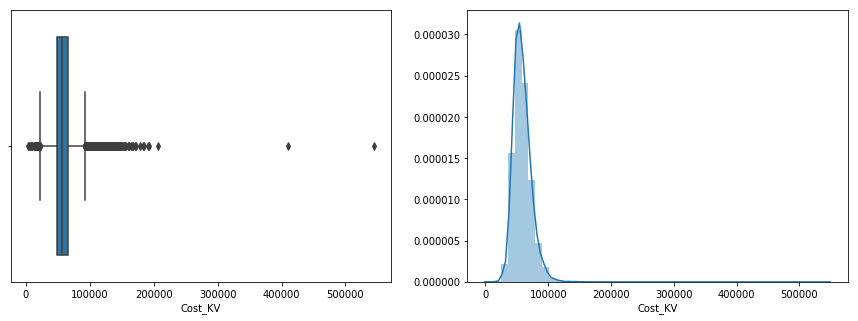

In [81]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Cost_KV"],ax=axs[0])
sns.distplot(data["Cost_KV"],ax=axs[1])

In [82]:
# Анализируем выбросы
print(len(data[data["Cost_KV"] > 100000]))
data[data["Cost_KV"] > 100000]

564


,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.00,0.00,0.00,3100000,110714.285714,0,0,Отличное,6,NaN,0,55.072500,82.906800,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
8,100319120,Заельцовский,Красный проспект,181,2890,Пропуски,34.00,0.00,0.00,3550000,104411.764706,0,0,NaN,0,NaN,0,55.072500,82.906900,2010,2017-06-16 08:07:18.013,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
399,20107120,Центральный,Фрунзе,226,493,Пропуски,53.00,0.00,0.00,5500000,103773.584906,0,0,NaN,0,NaN,0,55.038900,82.953500,2013,2018-01-24 12:45:33.390,Спортивная секция по тхэквондо ИТФ,318.0,17.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
408,100718685,Октябрьский,Закаменский микрорайон,20/3,1090,Изолированная,33.90,16.20,9.50,3720000,109734.513274,0,1,Отличное,6,Совмещенный,8,55.038300,82.958700,2017,2017-10-21 14:46:42.853,"Звездный, МБУ, молодежный центр",355.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
541,20015579,Дзержинский,Фрунзе,234,481,Изолированная,60.50,34.10,11.30,6300000,104132.231405,1,0,Евро-ремонт,5,Совмещенный,8,55.039114,82.956166,2010,2015-05-29 09:23:42.713,"Звездный, МБУ, молодежный центр",288.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
547,4010631,Центральный,Фрунзе,232,450,Пропуски,112.00,0.00,0.00,12000000,107142.857143,0,1,NaN,0,Несколько (2 и более),10,55.039342,82.955473,2012,2014-11-12 09:14:42.640,"Звездный, МБУ, молодежный центр",290.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
549,30013411,Дзержинский,Фрунзе,232,450,Изолированная,112.00,64.00,14.00,20000000,178571.428571,0,2,Отличное,6,Несколько (2 и более),10,55.039300,82.955500,2012,2014-07-09 15:29:40.167,"Звездный, МБУ, молодежный центр",290.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
557,4001533,Дзержинский,Фрунзе,232,450,Изолированная,112.00,0.00,14.00,16000000,142857.142857,0,2,Евро-ремонт,5,NaN,0,55.039300,82.955500,2012,2013-07-04 17:29:43.587,"Звездный, МБУ, молодежный центр",290.0,16.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
584,10015685,Дзержинский,Фрунзе,228,450,Пропуски,48.00,21.00,14.00,4950000,103125.000000,1,0,Отличное,6,Совмещенный,8,55.039200,82.954100,2012,2014-11-26 12:43:37.847,Спортивная секция по тхэквондо ИТФ,308.0,18.0,Средняя общеобразовательная школа №96 с углубл...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1444,30091950,Советский,Золотодолинская,31,26560,Изолированная,58.00,42.00,9.00,7500000,129310.344828,0,1,Евро-ремонт,5,Раздельный,9,54.832500,83.104400,1981,2013-10-24 15:21:31.677,Детская музыкальная школа №10,212.0,14.0,Лицей №130 им. академика М.А. Лаврентьева,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


Выполним Вензоризацию

In [83]:
from scipy.stats import mstats
data["Cost_KV"] = mstats.winsorize(data["Cost_KV"], limits=[0.01,0.01])
print(len(data[data["Cost_KV"] > 100000]))

0


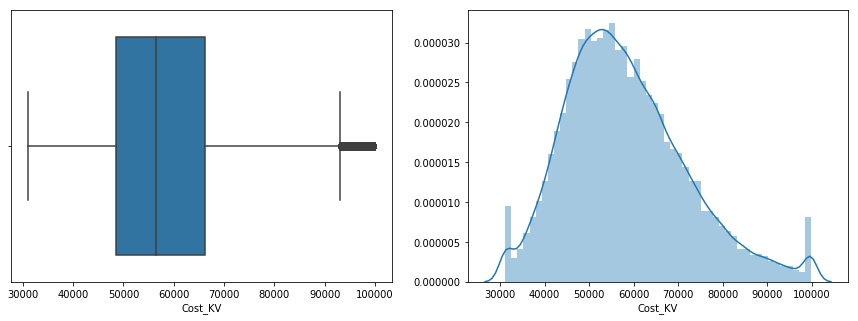

In [84]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Cost_KV"],ax=axs[0])
sns.distplot(data["Cost_KV"],ax=axs[1])

* **Balcon_Num, Lodgee_Num**

In [85]:
print("Количество пропусков Balcon_Num: ", len(data[data["Balcon_Num"].isna()]))
print("Количество пропусков Lodgee_Num: ", len(data[data["Lodgee_Num"].isna()]))

Количество пропусков Balcon_Num:  0
Количество пропусков Lodgee_Num:  0


In [86]:
data["Balcon_Num"].value_counts()

0     40090
1     22684
2       764
3        43
4         4
10        2
42        1
Name: Balcon_Num, dtype: int64

In [87]:
data["Lodgee_Num"].value_counts()

0     38055
1     23368
2      1984
3       160
4        10
10        4
7         3
13        1
8         1
6         1
5         1
Name: Lodgee_Num, dtype: int64

Есть Балкон / Лоджия

In [88]:
data["Balcon_Num"] = np.where(data["Balcon_Num"] != 0, 1 ,0)
data["Lodgee_Num"] = np.where(data["Lodgee_Num"] != 0, 1 ,0)
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,...,metro_Золотая Нива,metro_Красный проспект,metro_Маршала Покрышкина,metro_Октябрьская,metro_Площадь Гарина-Михайловского,metro_Площадь Ленина,metro_Площадь Маркса,metro_Речной вокзал,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,Отличное,6,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,NaN,0,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,Хорошее,2,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


* **Sost**

In [89]:
print("Количество пропусков: ", len(data[data["Sost"].isna()]))

Количество пропусков:  11640


In [90]:
data.drop(["Sost_ID"],axis=1,inplace=True)

In [91]:
data["Sost"].value_counts()

Хорошее               22378
Отличное              11988
Самоотделка            6283
Удовлетворительное     4777
Требует ремонта        3361
Евро-ремонт            2075
Отделка под ключ       1086
Name: Sost, dtype: int64

In [92]:
data["Sost"] = np.where(data["Sost"].isna(),"Пропуски",data["Sost"])

In [93]:
data = pd.get_dummies(data=data,columns=["Sost"],prefix="sost")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,Clozet,Clozet_ID,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,...,metro_Сибирская,metro_Студенческая,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,NaN,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,NaN,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,NaN,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,Раздельный,9,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,NaN,0,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


* **Clozet**

In [94]:
print("Количество пропусков: ", len(data[data["Clozet"].isna()]))

Количество пропусков:  11497


In [95]:
data.drop(["Clozet_ID"],axis=1,inplace=True)

In [96]:
data["Clozet"].value_counts()

Совмещенный              29181
Раздельный               21117
Несколько (2 и более)     1471
Общий                      182
Душ                         33
Без ванны                   24
Сидячая ванна               23
На улице                    22
На этаже                    19
В доме                      15
нет                          4
Name: Clozet, dtype: int64

In [97]:
data["Clozet"] = np.where(data["Clozet"] == "Общий","Совмещенный",data["Clozet"])
data["Clozet"] = np.where(((data["Clozet"].isin(["Совмещенный","Раздельный","Несколько (2 и более)"])) | (data["Clozet"].isna())),data["Clozet"],"Другое")
data["Clozet"] = np.where(data["Clozet"].isna(),"Пропуски",data["Clozet"])
data["Clozet"].value_counts()

Совмещенный              29363
Раздельный               21117
Пропуски                 11497
Несколько (2 и более)     1471
Другое                     140
Name: Clozet, dtype: int64

In [98]:
data = pd.get_dummies(data=data,columns=["Clozet"],prefix="clozet")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,...,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,clozet_Другое,clozet_Несколько (2 и более),clozet_Пропуски,clozet_Раздельный,clozet_Совмещенный
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


* **Date_Postr, Date_Create**

In [99]:
print("Количество пропусков: ", len(data[data["Date_Postr"].isna()]))
print("Количество пропусков: ", len(data[data["Date_Create"].isna()]))

Количество пропусков:  0
Количество пропусков:  0


Проверим кол-во записей, если год постройки меньше количества записей

In [100]:
print(len(data[data["Date_Postr"] > data["Date_Create_year"]]))

316


In [101]:
# Обработка на втором этапе

* **lat, Long**

In [102]:
print("Количество пропусков: ", len(data[data["lat"].isna()]))
print("Количество пропусков: ", len(data[data["Long"].isna()]))

Количество пропусков:  0
Количество пропусков:  0


In [103]:
print("Количество пропусков: ", len(data[data["lat"] == 0]))
print("Количество пропусков: ", len(data[data["Long"] == 0]))

Количество пропусков:  59
Количество пропусков:  59


Восстановим часть координат по адресу

In [104]:
data["House_Number"]=data["House_Number"].str.replace(" ","").str.lower()
data["full_address_home"] = "Новосибирск, " + data["District"] + ", " + data["Street"] + ", " + data["House_Number"]
data["full_address_home"] = data["full_address_home"].str.replace(" ","+")
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,...,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,clozet_Другое,clozet_Несколько (2 и более),clozet_Пропуски,clozet_Раздельный,clozet_Совмещенный,full_address_home
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181"
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181"
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181"
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,55.0725,82.9069,2010,2015-03-10 10:07:47.120,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181"
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,55.0725,82.9069,2010,2018-08-15 11:51:03.820,"Спектр, центр развития и творчества молодежи",337.0,12.0,"Сибирский Кадетский Корпус, школа-интернат",142.0,3.0,"Берёзка, детский сад №272 комбинированного вида",278.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181"


In [105]:
# Функция восстановления координат оп адресу
def add_info_geo(df,address):
    latit = list()
    longit = list()
    i = 0  
    for index, row in df[(df["lat"] == 0) | (df["in_novosib"] == 0)].iterrows():
        try:
            html = urlopen("https://geocode-maps.yandex.ru/1.x/?geocode="+quote(row[address]))
            soup = BeautifulSoup(html.read(), "html.parser")
            featuremember = soup.find("featuremember")     
            geo_cord = featuremember.find("pos").text.split(" ")  
            df.loc[index, "lat"] = float(geo_cord[1])
            df.loc[index, "Long"] = float(geo_cord[0])
        except (TypeError,NameError,urllib.error.HTTPError):
            df.loc[index, "lat"] = 0
            df.loc[index, "Long"] = 0

    return df

**Координаты Новосибирска**

* upperCorner:83.160181:55.199424
* lowerCorner:82.751897:54.800912

Проверим, какие координаты не лежат в пределах Новосибирска

In [106]:
def in_novosibirsk(x):
    if ((x["lat"] >= 54.800912) & (x["lat"] <= 55.199424)) or ((x["Long"] >= 82.751897) & (x["Long"] <=83.160181)):
        return 1
    else:
        return 0

In [107]:
data["in_novosib"] = data.apply(lambda x: in_novosibirsk(x),axis=1)
data[data["in_novosib"]==0].head()
print(len(data[data["in_novosib"]==0]))

112


In [108]:
data = add_info_geo(data,"full_address_home")
data[(data["lat"] == 0) | (data["in_novosib"] == 0)].head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,lat,Long,Date_Postr,Date_Create,Childrens_leisure,Childrens_Distance,Childrens_Count,Schools,Schools_Distance,Schools_Count,Kindergarten,Kindergarten_Distance,...,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,clozet_Другое,clozet_Несколько (2 и более),clozet_Пропуски,clozet_Раздельный,clozet_Совмещенный,full_address_home,in_novosib
25107,20150991,Октябрьский,Степная,45,0,Пропуски,44.0,26.0,7.0,2350000,53409.090909,0,0,54.975941,82.870151,0,2018-09-07 12:51:37.790,"АЗБУКА КАРАТЕ, детская школа спортивного развития",130.0,20.0,Средняя общеобразовательная школа №20,326.0,3.0,"Дочки и сыночки, детский досуговый центр",163.0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Октябрьский,+Степная,+45",0
36035,20093083,Советский,Приморская,10/2,0,Изолированная,64.6,33.8,11.5,2650000,41021.671827,0,1,54.857891,82.988980,0,2016-03-21 10:07:47.640,"Дельфин, МКУ, центр военно-патриотического вос...",109.0,9.0,Средняя общеобразовательная школа №80,362.0,2.0,"Сказка, детский сад №199",423.0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,"Новосибирск,+Советский,+Приморская,+10/2",0
36036,20093267,Советский,Приморская,10/2,0,Пропуски,70.3,34.1,11.6,2800000,39829.302987,0,1,54.857891,82.988980,0,2016-05-18 08:40:24.533,"Дельфин, МКУ, центр военно-патриотического вос...",109.0,9.0,Средняя общеобразовательная школа №80,362.0,2.0,"Сказка, детский сад №199",423.0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,"Новосибирск,+Советский,+Приморская,+10/2",0
36037,10092789,Советский,Приморская,10/2,0,Пропуски,42.6,16.7,13.5,1650000,38732.394366,0,0,54.857891,82.988980,0,2016-05-18 08:39:12.803,"Дельфин, МКУ, центр военно-патриотического вос...",109.0,9.0,Средняя общеобразовательная школа №80,362.0,2.0,"Сказка, детский сад №199",423.0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Советский,+Приморская,+10/2",0
40209,20014575,Дзержинский,Авиастроителей,4/1,0,Пропуски,45.0,0.0,0.0,2700000,60000.000000,0,0,55.071097,82.970475,0,2014-02-18 08:51:32.827,"Звездный, МБУ, клуб юных техников",186.0,15.0,Средняя общеобразовательная школа №36,327.0,3.0,Детский сад №262 комбинированного вида,97.0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Дзержинский,+Авиастроителей,+4/1",0


In [109]:
data["in_novosib"] = data.apply(lambda x: in_novosibirsk(x),axis=1)
print("Количество пропусков: ", len(data[(data["lat"] == 0) | (data["in_novosib"] == 0)]))

Количество пропусков:  49


* **Количественные факторы соц. объъектов**

In [110]:
for_drop = ["Childrens_leisure","Schools","Kindergarten","Products","Sport"]
data.drop(for_drop, axis=1, inplace = True)

*Childrens_Distance, Childrens_Count*

In [111]:
print("Количество пропусков Childrens_Distance: ", len(data[data["Childrens_Distance"].isna()]))
print("Количество пропусков Childrens_Count: ", len(data[data["Childrens_Count"].isna()]))

Количество пропусков Childrens_Distance:  6088
Количество пропусков Childrens_Count:  6088


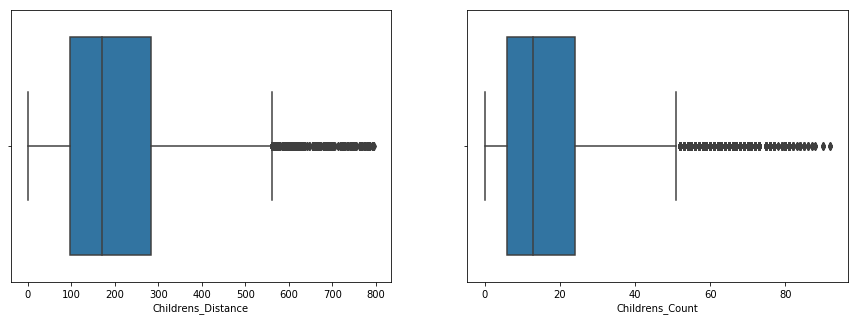

In [112]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Childrens_Distance"],ax=axs[0])
sns.boxplot(data["Childrens_Count"],ax=axs[1])

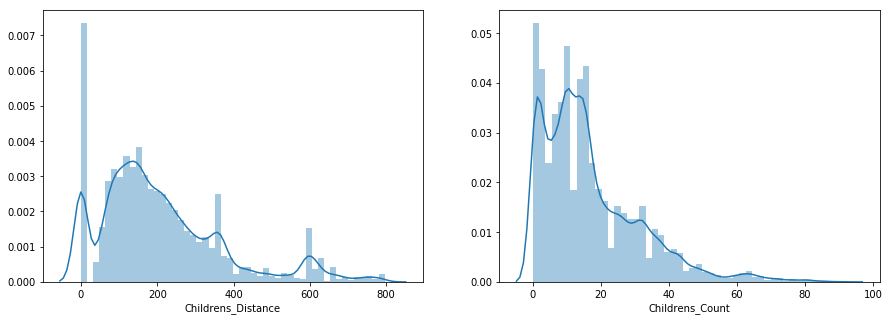

In [113]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.distplot(data[data["Childrens_Distance"].notnull()]["Childrens_Distance"],ax=axs[0])
sns.distplot(data[data["Childrens_Count"].notnull()]["Childrens_Count"],ax=axs[1])

*Schools_Distance Schools_Count*

In [114]:
print("Количество пропусков Schools_Distance: ", len(data[data["Schools_Distance"].isna()]))
print("Количество пропусков Schools_Count: ", len(data[data["Schools_Count"].isna()]))

Количество пропусков Schools_Distance:  6088
Количество пропусков Schools_Count:  6088


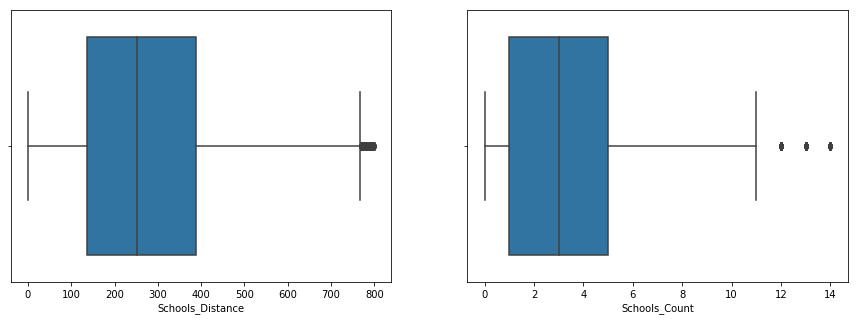

In [115]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Schools_Distance"],ax=axs[0])
sns.boxplot(data["Schools_Count"],ax=axs[1])

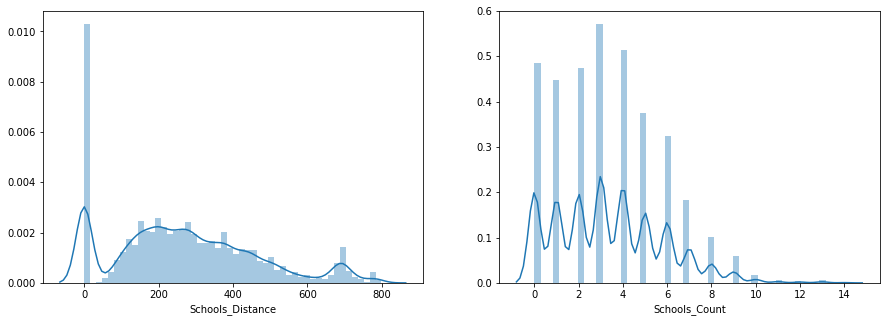

In [116]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.distplot(data[data["Schools_Distance"].notnull()]["Schools_Distance"],ax=axs[0])
sns.distplot(data[data["Schools_Count"].notnull()]["Schools_Count"],ax=axs[1])

*Kindergarten_Distance Kindergarten_Count*

In [117]:
print("Количество пропусков Kindergarten_Distance: ", len(data[data["Kindergarten_Distance"].isna()]))
print("Количество пропусков Kindergarten_Count: ", len(data[data["Kindergarten_Count"].isna()]))

Количество пропусков Kindergarten_Distance:  6088
Количество пропусков Kindergarten_Count:  6088


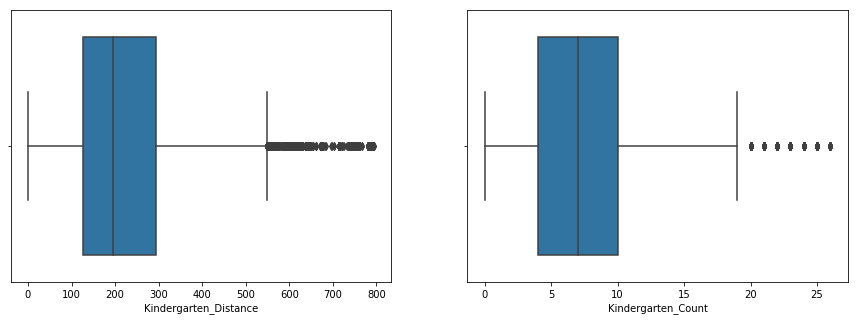

In [118]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Kindergarten_Distance"],ax=axs[0])
sns.boxplot(data["Kindergarten_Count"],ax=axs[1])

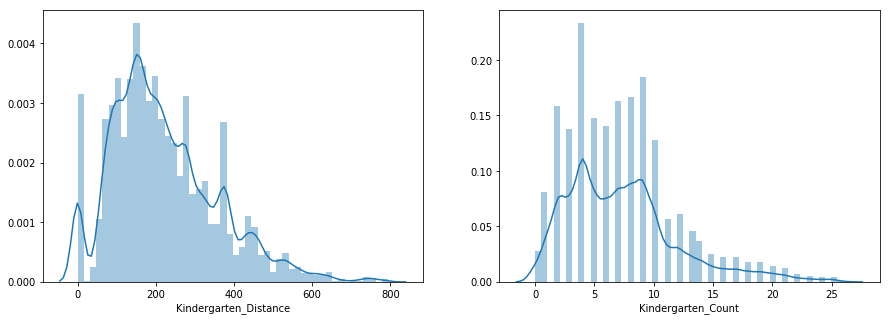

In [119]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.distplot(data[data["Kindergarten_Distance"].notnull()]["Kindergarten_Distance"],ax=axs[0])
sns.distplot(data[data["Kindergarten_Count"].notnull()]["Kindergarten_Count"],ax=axs[1])

*Products_Distance Products_Count*

In [120]:
print("Количество пропусков Products_Distance: ", len(data[data["Products_Distance"].isna()]))
print("Количество пропусков Products_Count: ", len(data[data["Products_Count"].isna()]))

Количество пропусков Products_Distance:  6088
Количество пропусков Products_Count:  6088


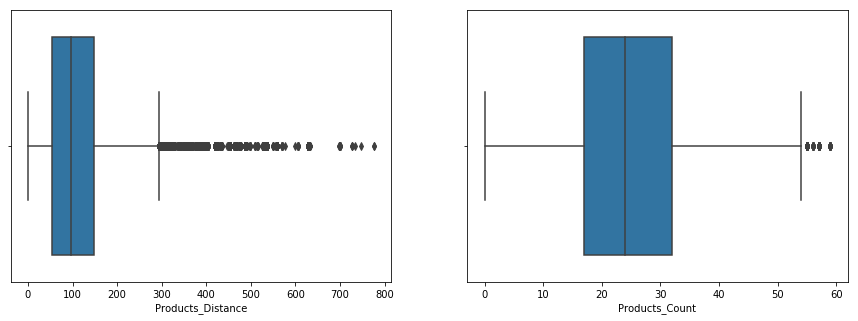

In [121]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data["Products_Distance"],ax=axs[0])
sns.boxplot(data["Products_Count"],ax=axs[1])

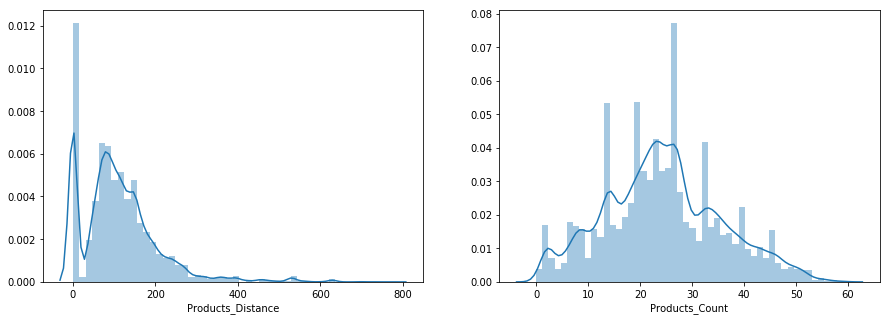

In [122]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.distplot(data[data["Products_Distance"].notnull()]["Products_Distance"],ax=axs[0])
sns.distplot(data[data["Products_Count"].notnull()]["Products_Count"],ax=axs[1])

* Генерируем фичу возраст дома на момент продажи

In [123]:
data["house_age"] = data["Date_Create_year"] - data["Date_Postr"]
data.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,lat,Long,Date_Postr,Date_Create,Childrens_Distance,Childrens_Count,Schools_Distance,Schools_Count,Kindergarten_Distance,Kindergarten_Count,Products_Distance,Products_Count,...,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,clozet_Другое,clozet_Несколько (2 и более),clozet_Пропуски,clozet_Раздельный,clozet_Совмещенный,full_address_home,in_novosib,house_age
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,8
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,10
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,9
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,55.0725,82.9069,2010,2015-03-10 10:07:47.120,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181",1,5
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,55.0725,82.9069,2010,2018-08-15 11:51:03.820,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181",1,8


* Загружаем курсы валют

In [124]:
exchange_rates = pd.read_csv("курсы валют.csv", sep=";")
exchange_rates["Date_Create"] = pd.to_datetime(exchange_rates["Date_Create"])
exchange_rates["curs"] = exchange_rates["curs"].str.replace(",",".").astype(float)
exchange_rates["Date_Create_year"] = pd.DatetimeIndex(exchange_rates["Date_Create"]).year
exchange_rates["Date_Create_month"] = pd.DatetimeIndex(exchange_rates["Date_Create"]).month
exchange_rates["Date_Create_day"] = pd.DatetimeIndex(exchange_rates["Date_Create"]).day
print(exchange_rates["Date_Create"].min())
print(exchange_rates["Date_Create"].max())
exchange_rates.head()

2013-01-02 00:00:00
2019-12-01 00:00:00


,Date_Create,curs,Date_Create_year,Date_Create_month,Date_Create_day
0,2013-10-01,30.4215,2013,10,1
1,2013-11-01,30.3650,2013,11,1
2,2013-12-01,30.2537,2013,12,1
3,2013-01-15,30.2607,2013,1,15
4,2013-01-16,30.2556,2013,1,16


In [125]:
print(data["Date_Create"].min())
print(data["Date_Create"].max())
print(data.shape)

2013-01-04 12:26:19.303000
2018-10-23 15:36:07.750000
(63588, 101)


In [126]:
data1 = pd.merge(data,exchange_rates,how="left",on=["Date_Create_year","Date_Create_month","Date_Create_day"])
data1.head()

,Cart_Number,District,Street,House_Number,Metro_m,Flats_Plan,Space_Total,Space_Living,Space_Kitchen,Cost,Cost_KV,Balcon_Num,Lodgee_Num,lat,Long,Date_Postr,Date_Create_x,Childrens_Distance,Childrens_Count,Schools_Distance,Schools_Count,Kindergarten_Distance,Kindergarten_Count,Products_Distance,Products_Count,...,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,clozet_Другое,clozet_Несколько (2 и более),clozet_Пропуски,clozet_Раздельный,clozet_Совмещенный,full_address_home,in_novosib,house_age,Date_Create_y,curs
0,10103978,Центральный,Красный проспект,181,2830,Пропуски,37.0,0.0,0.0,3250000,87837.837838,0,0,55.0725,82.9068,2008,2016-09-27 10:07:31.490,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,8,2016-09-27,64.1506
1,10100878,Центральный,Красный проспект,181,2830,Пропуски,42.0,0.0,0.0,3790000,90238.095238,0,0,55.0725,82.9068,2008,2018-07-28 08:22:15.223,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,10,2018-07-28,62.9726
2,10104701,Центральный,Красный проспект,181,2830,Пропуски,28.0,0.0,0.0,3100000,99846.153846,0,0,55.0725,82.9068,2008,2017-06-23 10:36:04.610,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,"Новосибирск,+Центральный,+Красный+проспект,+181",1,9,2017-06-23,60.1482
3,20035060,Заельцовский,Красный проспект,181,2890,Изолированная,59.0,36.0,10.0,4900000,83050.847458,0,1,55.0725,82.9069,2010,2015-03-10 10:07:47.120,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181",1,5,2015-03-10,65.9414
4,10031975,Заельцовский,Красный проспект,181,2890,Пропуски,42.0,18.0,12.0,3750000,89285.714286,0,1,55.0725,82.9069,2010,2018-08-15 11:51:03.820,337.0,12.0,142.0,3.0,278.0,5.0,113.0,17.0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"Новосибирск,+Заельцовский,+Красный+проспект,+181",1,8,2018-08-15,66.7535


In [127]:
len(data1[data1["curs"].isna()])

19457

Так как курс есть не на все дни, буду подтягивать ближайшую к этой дате

In [128]:
def nearest_date(df, exch):
    df["curs_new"] = 0
    for index, row in df.iterrows():
        if (index%1000==0):
            print(index)
        if (np.isnan(df["curs"][index])):
            s = pd.to_datetime(exch["Date_Create"])- pd.to_datetime(df['Date_Create_x'][index])
            s = s.dt.days
            #print(df['Date_Create'][index])
            min_date_index = s[s>0].idxmin()
            #print(min_date_index)
            df["curs_new"][index] = exch["curs"][min_date_index]
            #print(df["curs_new"][index])
        else:
            df["curs_new"][index] =  df["curs"][index]
    return df

In [129]:
res = nearest_date(data1[data1["curs"].isna()],exchange_rates)
len(res[res["curs_new"].isna()])

3000
5000
11000
15000
23000
24000
26000
29000
36000
38000
39000
42000
43000
49000
60000


0

In [134]:
res.to_csv("res.csv")

In [135]:
print(res.shape)
print(data1[data1["curs"].notnull()].shape)

(19457, 104)
(44131, 103)


In [136]:
data2 = pd.concat([data1[data1["curs"].notnull()],res], axis=0)
data2.shape

(63588, 104)

In [137]:
data2.curs.fillna(data2.curs_new, inplace=True)
data2.head()

,Balcon_Num,Cart_Number,Childrens_Count,Childrens_Distance,Cost,Cost_KV,Date_Create_day,Date_Create_day_of_the_week,Date_Create_month,Date_Create_quarter,Date_Create_x,Date_Create_y,Date_Create_year,Date_Postr,District,Flats_Plan,House_Number,Kindergarten_Count,Kindergarten_Distance,Lodgee_Num,Long,Metro_m,Products_Count,Products_Distance,Schools_Count,...,room_num_4,sost_Евро-ремонт,sost_Отделка под ключ,sost_Отличное,sost_Пропуски,sost_Самоотделка,sost_Требует ремонта,sost_Удовлетворительное,sost_Хорошее,stor_0,stor_100,stor_200,stor_300,storeys1_100,storeys1_200,storeys1_300,storeys1_400,storeys1_500,wall_Газопенобетон,wall_Дерево,wall_Кирпич,wall_Монолит,wall_Панель,wall_Шлакоблок,we_sale
0,0,10103978,12.0,337.0,3250000,87837.837838,27,1,9,3,2016-09-27 10:07:31.490,2016-09-27,2016,2008,Центральный,Пропуски,181,5.0,278.0,0,82.9068,2830,17.0,113.0,3.0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,10100878,12.0,337.0,3790000,90238.095238,28,5,7,3,2018-07-28 08:22:15.223,2018-07-28,2018,2008,Центральный,Пропуски,181,5.0,278.0,0,82.9068,2830,17.0,113.0,3.0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0,10104701,12.0,337.0,3100000,99846.153846,23,4,6,2,2017-06-23 10:36:04.610,2017-06-23,2017,2008,Центральный,Пропуски,181,5.0,278.0,0,82.9068,2830,17.0,113.0,3.0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,20035060,12.0,337.0,4900000,83050.847458,10,1,3,1,2015-03-10 10:07:47.120,2015-03-10,2015,2010,Заельцовский,Изолированная,181,5.0,278.0,1,82.9069,2890,17.0,113.0,3.0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,0,10031975,12.0,337.0,3750000,89285.714286,15,2,8,3,2018-08-15 11:51:03.820,2018-08-15,2018,2010,Заельцовский,Пропуски,181,5.0,278.0,1,82.9069,2890,17.0,113.0,3.0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


* Расстояние до локального центра

In [138]:
data[data["District"]=="Советский"]["Cost_KV"].max()

99846.1538461538

In [139]:
#Найдем координаты самой дорогой квартиры в каждом районе
dict_exp_flat = data[["District","Cost_KV"]].groupby(["District"],sort=False).max()["Cost_KV"]
dict_exp_flat.columns = ["District","Cost_KV"]
dict_exp_flat = dict_exp_flat.to_frame().reset_index()
dict_exp_flat

,District,Cost_KV
0,Центральный,99846.153846
1,Заельцовский,99846.153846
2,Калининский,99846.153846
3,Кировский,99846.153846
4,Ленинский,99846.153846
5,Дзержинский,99846.153846
6,Октябрьский,99846.153846
7,Советский,99846.153846
8,Железнодорожный,99846.153846
9,Первомайский,99846.153846


In [140]:
dict_exp_flat_gps = pd.merge(dict_exp_flat, data, how="inner", on=["District","Cost_KV"])
dict_exp_flat_gps = dict_exp_flat_gps[["District","Cost_KV","lat","Long"]]
dict_exp_flat_gps.drop_duplicates()

,District,Cost_KV,lat,Long
0,Центральный,99846.153846,55.072500,82.906800
1,Центральный,99846.153846,55.038900,82.953500
2,Центральный,99846.153846,55.039342,82.955473
3,Центральный,99846.153846,55.033400,82.928500
4,Центральный,99846.153846,55.032800,82.929100
5,Центральный,99846.153846,55.035300,82.930900
25,Центральный,99846.153846,55.035600,82.929800
38,Центральный,99846.153846,55.084700,82.673600
40,Центральный,99846.153846,55.044900,82.913200
41,Центральный,99846.153846,55.023800,82.918400


In [141]:
for index, row in data.iterrows():
    lat = dict_exp_flat_gps[dict_exp_flat_gps["District"] == row["District"]].lat.item()
    long = dict_exp_flat_gps[dict_exp_flat_gps["District"] == row["District"]].Long.item()
    if ((lat==np.nan) | (long==np.nan)):
        data.set_value(index,'dist_for_max',0)
    else:
        dist = cov_distance(row["lat"],row["Long"],lat,long)
        data.set_value(index,'dist_for_max',dist)

ValueError: can only convert an array of size 1 to a Python scalar

In [142]:
data.shape

(63588, 101)

### Моделирование

In [143]:
for col in data2.columns:
    print(col)

Balcon_Num
Cart_Number
Childrens_Count
Childrens_Distance
Cost
Cost_KV
Date_Create_day
Date_Create_day_of_the_week
Date_Create_month
Date_Create_quarter
Date_Create_x
Date_Create_y
Date_Create_year
Date_Postr
District
Flats_Plan
House_Number
Kindergarten_Count
Kindergarten_Distance
Lodgee_Num
Long
Metro_m
Products_Count
Products_Distance
Schools_Count
Schools_Distance
Space_Kitchen
Space_Living
Space_Total
Sport_Distance
Street
clozet_Другое
clozet_Несколько (2 и более)
clozet_Пропуски
clozet_Раздельный
clozet_Совмещенный
curs
curs_new
distr_Дзержинский
distr_Железнодорожный
distr_Заельцовский
distr_Калининский
distr_Кировский
distr_Ленинский
distr_Октябрьский
distr_Первомайский
distr_Советский
distr_Центральный
full_address_home
house_age
in_novosib
lat
metro_Берёзовая роща
metro_Гагаринская
metro_Заельцовская
metro_Золотая Нива
metro_Красный проспект
metro_Маршала Покрышкина
metro_Октябрьская
metro_Площадь Гарина-Михайловского
metro_Площадь Ленина
metro_Площадь Маркса
metro_Речной во

In [144]:
columns_for_drop = [
"curs_new",
"Date_Create_y",
"in_novosib",
"full_address_home",
"Cost",
"Cart_Number",
"District",
"Street",
"House_Number",
"Metro_m",
"Flats_Plan",
    "Date_Create_x"
]

In [145]:
df = data2.drop(columns_for_drop,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63588 entries, 0 to 63587
Data columns (total 92 columns):
Balcon_Num                            63588 non-null int64
Childrens_Count                       57500 non-null float64
Childrens_Distance                    57500 non-null float64
Cost_KV                               63588 non-null float64
Date_Create_day                       63588 non-null int64
Date_Create_day_of_the_week           63588 non-null int64
Date_Create_month                     63588 non-null int64
Date_Create_quarter                   63588 non-null int64
Date_Create_year                      63588 non-null int64
Date_Postr                            63588 non-null int64
Kindergarten_Count                    57500 non-null float64
Kindergarten_Distance                 57500 non-null float64
Lodgee_Num                            63588 non-null int64
Long                                  63588 non-null float64
Products_Count                        57500 non-null 

In [232]:
df.shape

(63588, 92)

In [146]:
df["Date_Create_year"].value_counts()

2017    13775
2016    12080
2015    11043
2013     9941
2014     9904
2018     6845
Name: Date_Create_year, dtype: int64

In [147]:
df_mod = df[(df["Date_Create_year"]>=2013) & (df["Date_Create_year"]<=2017)]
df_oot = df[df["Date_Create_year"]==2018]
y_mod = df_mod["Cost_KV"]
X_mod = df_mod.drop("Cost_KV",axis=1)
y_oot = df_oot["Cost_KV"]
X_oot = df_oot.drop("Cost_KV",axis=1)

In [148]:
print(y_mod.shape)
print(X_mod.shape)
print(y_oot.shape)
print(X_oot.shape)

(56743,)
(56743, 91)
(6845,)
(6845, 91)


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [150]:
X_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56743 entries, 0 to 63587
Data columns (total 91 columns):
Balcon_Num                            56743 non-null int64
Childrens_Count                       51492 non-null float64
Childrens_Distance                    51492 non-null float64
Date_Create_day                       56743 non-null int64
Date_Create_day_of_the_week           56743 non-null int64
Date_Create_month                     56743 non-null int64
Date_Create_quarter                   56743 non-null int64
Date_Create_year                      56743 non-null int64
Date_Postr                            56743 non-null int64
Kindergarten_Count                    51492 non-null float64
Kindergarten_Distance                 51492 non-null float64
Lodgee_Num                            56743 non-null int64
Long                                  56743 non-null float64
Products_Count                        51492 non-null float64
Products_Distance                     51492 non-null 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, train_size=0.75)

In [152]:
col_na_lust = [
    "Childrens_Distance",
    "Childrens_Count",
    "Schools_Distance",
    "Schools_Count",
    "Kindergarten_Distance",
    "Kindergarten_Count",
    "Products_Distance",
    "Products_Count",
    "Sport_Distance",
    "curs" ]

for col in col_na_lust:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_test[col] = X_test[col].fillna(X_test[col].median())
    X_oot[col] = X_oot[col].fillna(X_oot[col].median())

* Линейная регрессия 

In [153]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression in TEST sample: %.2f" % rms)

Linear Regression in TEST sample: 9089.90


In [154]:
y_pred2 = regr.predict(X_oot)
rms = sqrt(mean_squared_error(y_oot, y_pred2))
print("Linear Regression RMSE in OOT sample: %.2f" % rms)

Linear Regression RMSE in OOT sample: 10990.73


In [159]:
from sklearn.linear_model import Ridge

In [160]:
rdg = Ridge(alpha=1, max_iter=10e5)
rdg.fit(X_train,y_train)

y_pred = rdg.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Ridge RMSE in TEST sample: %.2f" % rms)

Ridge RMSE in TEST sample: 9088.61


* Бустинг

In [162]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, GroupKFold

In [164]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgb_oot = lgb.Dataset(X_oot, y_oot)

In [179]:
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 50
params['max_depth'] = 100
clf = lgb.train(params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's rmse: 13419.1
[2]	valid_0's rmse: 13180.6
[3]	valid_0's rmse: 12950.9
[4]	valid_0's rmse: 12768.6
[5]	valid_0's rmse: 12532.5
[6]	valid_0's rmse: 12372.9
[7]	valid_0's rmse: 12202.1
[8]	valid_0's rmse: 12047.2
[9]	valid_0's rmse: 11867.5
[10]	valid_0's rmse: 11724.3
[11]	valid_0's rmse: 11570.4
[12]	valid_0's rmse: 11463.8
[13]	valid_0's rmse: 11348.8
[14]	valid_0's rmse: 11228.3
[15]	valid_0's rmse: 11107.6
[16]	valid_0's rmse: 10960.8
[17]	valid_0's rmse: 10837.4
[18]	valid_0's rmse: 10717.6
[19]	valid_0's rmse: 10610.1
[20]	valid_0's rmse: 10515.3
[21]	valid_0's rmse: 10402.9
[22]	valid_0's rmse: 10323.2
[23]	valid_0's rmse: 10230.4
[24]	valid_0's rmse: 10150.4
[25]	valid_0's rmse: 10076.5
[26]	valid_0's rmse: 10005
[27]	valid_0's rmse: 9937.93
[28]	valid_0's rmse: 9864.17
[29]	valid_0's rmse: 9788.39
[30]	valid_0's rmse: 9712.2
[31]	valid_0's rmse: 9646.06
[32]	valid_0's rmse: 9583.16
[33]	valid_0's rmse: 9530.41
[34]	valid_0's rmse: 9474.31
[35]	valid_0's rmse: 9418.

In [180]:
y_pred=clf.predict(X_test,num_iteration=clf.best_iteration)
print('Метрика RMSE (выборка TEST) результат:', mean_squared_error(y_test, y_pred) ** 0.5)

Метрика RMSE (выборка TEST) результат: 7594.0488197394625


In [181]:
y_pred2=clf.predict(X_oot,num_iteration=clf.best_iteration)
print('Метрика RMSE (выборка OOT) результат:', mean_squared_error(y_oot, y_pred2) ** 0.5)

Метрика RMSE (выборка OOT) результат: 9470.52468488965
